# In this file we create the dataset for the pointwise random grids approach for the Heston model
In the forward pass we learn the **mapping** between **Heston parameters** and the option **implied volatility**, In this case the implied volatility surface is on an adaptive random grid 13(strikes)x11(maturities) a bit larger than the one used for the image based approach.

 In order to make a fair comparison we will consider the same parameters sets, then we will generate the random grids and create the dataset.
 
Below we upload the dataset .

In [1]:
#Set the directory of stored dataset
import os
os.chdir("C:/Users/pc/Desktop/politecnico/TESI/mio codice/Heston/grid based")

In [2]:
#import libraries
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#Open compressed dataset

f = gzip.GzipFile('HestonTrainSet.txt.gz', "r")
dat=np.load(f) #load data in a numpy array
xx=dat[:,:5]   #extract first 5 columns (Heston parameters)

print("\nInput (Heston parameter sets) shape (samples × 5 parameters):", xx.shape)
print("  - Each row contains: [ν₀, ρ, γ, θ, κ]")


Input (Heston parameter sets) shape (samples × 5 parameters): (12000, 5)
  - Each row contains: [ν₀, ρ, γ, θ, κ]


In [3]:
# ADD AN ADDITIONAL 4000 SETS OF PARAMETERS, USEFUL TO PRESERVE DATA QUALITY IN THE IMPLIED VOLATILITIES COMPUTATION
# ==================================================================================================================

# Check the existing data types
print("Data type of existing parameters:", xx.dtype)

# Define parameter bounds 
param_bounds = {
    'v0': (0.0001, 0.04),
    'rho': (-0.95, -0.1),
    'gamma': (0.01, 1.0),  # vol-vol
    'theta': (0.01, 0.2),  # mean reverting level
    'kappa': (1.0, 10.0)    # Mean reversion speed
}

# Generate 4000 new parameter sets that satisfy Feller condition (2κθ > γ²)
n_new_samples = 4000
new_params = np.zeros((n_new_samples, 5), dtype=xx.dtype)  # Use same dtype as existing data
rejected_count = 0
generated_count = 0

while generated_count < n_new_samples:
    # Generate candidate parameters
    v0 = np.random.uniform(low=param_bounds['v0'][0], high=param_bounds['v0'][1])
    rho = np.random.uniform(low=param_bounds['rho'][0], high=param_bounds['rho'][1])
    gamma = np.random.uniform(low=param_bounds['gamma'][0], high=param_bounds['gamma'][1])
    theta = np.random.uniform(low=param_bounds['theta'][0], high=param_bounds['theta'][1])
    kappa = np.random.uniform(low=param_bounds['kappa'][0], high=param_bounds['kappa'][1])
    
    # Check Feller condition (2κθ > γ²)
    if 2 * kappa * theta > gamma**2:
        new_params[generated_count, :] = [v0, rho, gamma, theta, kappa]
        generated_count += 1
    else:
        rejected_count += 1

# Combine with existing parameters
combined_params = np.vstack((xx, new_params))

# Print statistics
print(f"\nGenerated {n_new_samples} valid parameter sets")
print(f"Rejected {rejected_count} parameter sets that violated Feller condition")
print(f"Acceptance rate: {n_new_samples/(n_new_samples+rejected_count):.1%}")

# Verify the results
print("\nOriginal samples:", xx.shape)
print("New samples:", new_params.shape)
print("Combined samples:", combined_params.shape)
print("\nFirst 5 rows of new parameters:")
print(new_params[:5])
print("\nLast 5 rows of combined parameters:")
print(combined_params[-5:])

Data type of existing parameters: float64

Generated 4000 valid parameter sets
Rejected 854 parameter sets that violated Feller condition
Acceptance rate: 82.4%

Original samples: (12000, 5)
New samples: (4000, 5)
Combined samples: (16000, 5)

First 5 rows of new parameters:
[[ 0.01334567 -0.4814277   0.98283379  0.16378545  4.01230742]
 [ 0.02779274 -0.74893062  0.93895692  0.13213509  9.5404382 ]
 [ 0.02969746 -0.26410795  0.83796738  0.12050258  4.25921643]
 [ 0.03236807 -0.83922672  0.55666438  0.08984388  2.41197434]
 [ 0.02482264 -0.81396612  0.05580222  0.11991826  5.64483024]]

Last 5 rows of combined parameters:
[[ 6.42667245e-03 -9.49680186e-01  8.33272362e-01  1.21444918e-01
   3.35661328e+00]
 [ 2.33837816e-02 -9.36911878e-01  2.98704692e-01  5.59198867e-02
   9.33138133e+00]
 [ 2.35056353e-02 -9.32824671e-01  7.50984777e-01  6.77725272e-02
   5.11487398e+00]
 [ 1.63671061e-02 -4.47143575e-01  2.13394920e-01  8.03333748e-02
   8.80146170e+00]
 [ 3.58071719e-02 -6.32322636e-

# Let's have a look at the parameters sets and gain some more informations


=== HESTON PARAMETERS ANALYSIS (xx) ===
       ν₀ (initial variance)  ρ (spot-vol correlation)  γ (vol of variance)  \
count             16000.0000                16000.0000           16000.0000   
mean                  0.0181                   -0.3926               0.6072   
std                   0.0120                    0.2317               0.3317   
min                   0.0001                   -0.9498               0.0100   
1%                    0.0002                   -0.9319               0.0176   
5%                    0.0008                   -0.8553               0.0453   
50%                   0.0173                   -0.3174               0.7359   
95%                   0.0377                   -0.1194               0.9802   
99%                   0.0395                   -0.1040               0.9964   
max                   0.0400                   -0.1000               1.0000   

       θ (mean reverting level of variance)  κ (speed of mean reversion)  
count         

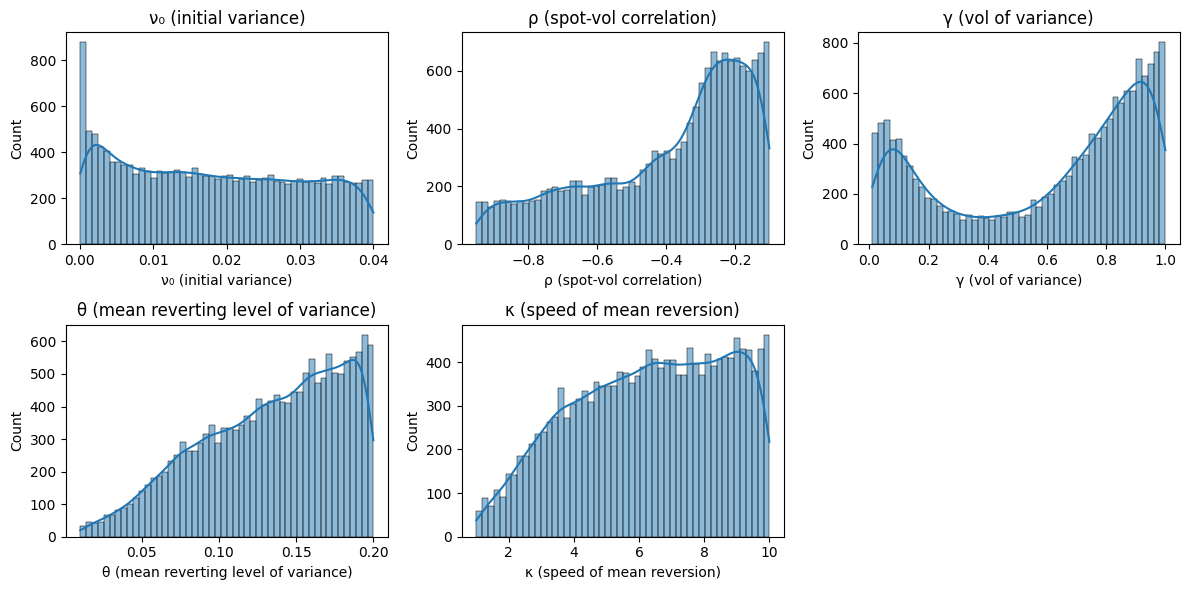

In [4]:
import seaborn as sns

#INPUT (HESTON PARAMETERS) ANALYSIS 

# Heston parameter names (for clarity)
#v0    ∈ [0.0001, 0.04]        (initial variance)
#rho   ∈ [-0.95, -0.1]         (spot-vol correlation)
#gamma ∈ [0.01, 1.0]           (vol of variance)
#theta ∈ [0.01, 0.2]           (mean reverting level of variance)
#kappa ∈ [1, 10.0]             (speed of mean reversion)
param_names = [
    'ν₀ (initial variance)',
    'ρ (spot-vol correlation)',
    'γ (vol of variance)',
    'θ (mean reverting level of variance)',
    'κ (speed of mean reversion)',
]


# Create DataFrame for statistical analysis
df_xx = pd.DataFrame(combined_params, columns=param_names)

# Descriptive statistics
print("\n=== HESTON PARAMETERS ANALYSIS (xx) ===")
print(df_xx.describe(percentiles=[0.01, 0.05, 0.95, 0.99]).round(4))

# Validate physical bounds
print("\n=== PHYSICAL BOUNDS ===")
print(f"ν₀:    Min={df_xx.iloc[:,0].min():.4f}, Max={df_xx.iloc[:,0].max():.4f} (Expected: ~[0.0001, 0.04])")
print(f"ρ:   Min={df_xx.iloc[:,1].min():.4f}, Max={df_xx.iloc[:,1].max():.4f} (Expected: ~[-0.95, -0.1])")
print(f"κ: Min={df_xx.iloc[:,4].min():.4f}, Max={df_xx.iloc[:,4].max():.4f} (Expected: ~[1, 10])")

# Plot distributions
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_xx.columns):
    plt.subplot(2, 3, i+1)
    sns.histplot(df_xx[col], bins=50, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Step 1: Data Generation


## **Inputs:** 
###  1. $\nu_{0}$ inital variance
###  2. $\rho$ spot-vol correlation
###  3. $\gamma$ vol of variance
###  4. $\theta$ mean reverting level of variance
###  5. $\kappa$ speed of mean reversion 
###  6. $K$ option strike price
###  7. $T$ option maturity
    
## **Output:**
### Option Implied volatility 

# Generate the random grids
We will associate each parameter set $\theta -> (K_i,T_j)_{i=1,..13}^{j=1,..,11}$ a unique random grid of couples of 11 maturities, each one uniformly sampled from a specified interval, for each maturity we will generate 13 strikes which will depend on the maturity (the longer, the more distanced the strikes)

In [5]:
np.random.seed(42) # Fix seed for reproducibility

def generate_random_heston_grids(combined_params, S0=1.0, l=0.55, u=0.3):
    """
    Generates random grids for Heston parameters following specified rules.
    
    Args:
        combined_params: numpy array of Heston parameters (16000, 5) [ν₀, ρ, γ, θ, κ]
        S0: initial price (default 1.0)
        l: lower bound multiplier (default 0.55)
        u: upper bound multiplier (default 0.3)
        
    Returns:
        numpy array of shape (12000*143, 7) with columns: [ν₀, ρ, γ, θ, κ, strike, maturity]
    """
    # Define maturity intervals (11 intervals)
    maturity_intervals = [
        (0.003, 0.03), (0.03, 0.09), (0.09, 0.15), (0.15, 0.3), (0.3, 0.5),
        (0.5, 0.75), (0.75, 1.0), (1.0, 1.25), (1.25, 1.5), (1.5, 2.0), (2.0, 2.5)
    ]
    
    num_samples = combined_params.shape[0]
    num_points_per_sample = 11 * 13  # 11 maturities × 13 strikes each
    total_points = num_samples * num_points_per_sample
    
    # Initialize output array
    output = np.zeros((total_points, 7))
    
    for i in range(num_samples):
        # Get current Heston parameters
        heston_params = combined_params[i]
        
        # Generate points for this parameter set
        points = np.zeros((num_points_per_sample, 7))
        
        for j, (t_min, t_max) in enumerate(maturity_intervals):
            # Generate random maturity in this interval
            T = np.random.uniform(t_min, t_max)
            
            # Calculate strike bounds
            sqrt_T = np.sqrt(T)
            K_min = S0 * (1 - l * sqrt_T)
            K_max = S0 * (1 + u * sqrt_T)
            K_mid_low = S0 * (1 - 0.2 * sqrt_T)
            K_mid_high = S0 * (1 + 0.2 * sqrt_T)
            
            # Generate strikes according to specified distribution
            # 4 strikes in [K_min, K_mid_low]
            strikes_low = np.random.uniform(K_min, K_mid_low, 4)
            strikes_low = np.sort(strikes_low)   #sort the strikes
            
            # 7 strikes in [K_mid_low, K_mid_high]
            strikes_mid = np.random.uniform(K_mid_low, K_mid_high, 7)
            strikes_mid = np.sort(strikes_mid)   #sort the strikes

            # 2 strikes in [K_mid_high, K_max]
            strikes_high = np.random.uniform(K_mid_high, K_max, 2)
            strikes_high = np.sort(strikes_high)   #sort the strikes
            # Combine all strikes
            strikes = np.concatenate([strikes_low, strikes_mid, strikes_high])
            
            # Create points for this maturity
            start_idx = j * 13
            end_idx = (j + 1) * 13
            
            # Fill Heston parameters
            points[start_idx:end_idx, :5] = heston_params
            
            # Fill strikes
            points[start_idx:end_idx, 5] = strikes
            
            # Fill maturity
            points[start_idx:end_idx, 6] = T
        
        # Add to output array
        output[i*num_points_per_sample:(i+1)*num_points_per_sample] = points
    
    return output

random_grid_data = generate_random_heston_grids(combined_params)
print(f"Random grid dataset shape: {random_grid_data.shape}") # Output shape will be (16000*143, 7) = (2,288,000, 7)

# Print the first two rows as example
print("First two rows of the generated dataset:")
print("Columns: [ν₀, ρ, γ, θ, κ, strike, maturity]")
for i in range(2):
    print(f"Row {i+1}: {random_grid_data[i]}")

Random grid dataset shape: (2288000, 7)
First two rows of the generated dataset:
Columns: [ν₀, ρ, γ, θ, κ, strike, maturity]
Row 1: [ 0.01683994 -0.12410636  0.87622854  0.16472127  9.58028822  0.9432724
  0.01311258]
Row 2: [ 0.01683994 -0.12410636  0.87622854  0.16472127  9.58028822  0.96101277
  0.01311258]


Now we have to compute the EU vanilla call prices through FFT to have the ground truth of the forward pass, here's the **FFT algorithm** to compute them

In [6]:
from scipy.interpolate import interp1d
from scipy.optimize import brentq
from scipy.stats import norm

def char_exp(v, params,T):
    """
    Characteristic exponent for Heston 1993 model (B(ψ) + C(ψ))
    
    Parameters:
    - v: Fourier transform variable (can be array or scalar)
    - params: tensor containing Heston parameters:
    -T: time to maturity
    
    Returns:
    - Characteristic exponent value(s)
    """
    # Extract parameters [ν₀, ρ, γ, θ, κ]
    V0 = params[0]
    rho = params[1]
    gamma = params[2]
    theta = params[3]
    kappa = params[4]
     
    # Calculate intermediate terms
    zeta = -0.5 * (v**2 + 1j*v)  # ζ(ω)
    gamma_adj = kappa - rho * gamma * v * 1j  # γ(ω)
    psi = np.sqrt(gamma_adj**2 - 2 * gamma**2 * zeta)  # ψ(ω)
    
    # Calculate B(ψ)
    numerator_B = 2 * zeta * (1 - np.exp(-psi * T)) * V0
    denominator_B = 2 * psi - (psi - gamma_adj) * (1 - np.exp(-psi * T))
    B = numerator_B / denominator_B
    
    # Calculate C(ψ)
    log_term = np.log((2 * psi - (psi - gamma_adj) * (1 - np.exp(-psi * T))) / (2 * psi))
    C = (-2 * kappa * theta / gamma**2) * (2 * log_term + (psi - gamma_adj) * T)
    
    return B + C

def cf_Heston(v, T, r, params):
    """
    Heston characteristic function as proposed by Schoutens (2004)
    
    Parameters:
    - v: Fourier transform variable (can be array or scalar)
    - T: time to maturity
    - r: risk-free interest rate
    - params: tensor containing Heston parameters:

    
    Returns:
    - Characteristic function value(s)
    """
    # Extract parameters [ν₀, ρ, γ, θ, κ]
    v0 = params[0]
    rho = params[1]
    gamma = params[2]
    theta = params[3]
    kappa = params[4]

    xi = kappa - gamma * rho * v * 1j
    d = np.sqrt(xi**2 + gamma**2 * (v**2 + 1j * v))
    g1 = (xi + d) / (xi - d)
    g2 = 1 / g1
    cf = np.exp(
        1j * v * r * T
        + (kappa * theta) / (gamma**2) * ((xi - d) * T - 2 * np.log((1 - g2 * np.exp(-d * T)) / (1 - g2)))
        + (v0 / gamma**2) * (xi - d) * (1 - np.exp(-d * T)) / (1 - g2 * np.exp(-d * T))
    )
    return cf


def FFT_CM_Call(Strike, params, T, r, S0):
    """
    Compute EU vanilla option prices using Carr-Madan FFT method
    
    Parameters:
    - Strike: Strike prices
    - params: Model parameters
    - T: Time to maturity
    - r: Risk-free rate
    - S0: Spot price
    
    Returns:
    - Option prices for that given maturity
    """
    # Discretization parameters
    Npow = 15
    N = 2**Npow
    A = 1200

    # Discretization step
    eta = A/N
    
    # Avoid division by zero
    v = np.arange(0, A*(N-1)/N + eta, eta)
    v[0] = 1e-22

    # Numerical parameter for log-moneyness grid
    lambda_param = 2 * np.pi / (N * eta)
    
    # Grid of log-moneyness
    k = -lambda_param * N/2 + lambda_param * np.arange(N)

    # Characteristic function
    #char_func = lambda v: np.exp(char_exp(v, params,T))
    char_func = lambda v: cf_Heston(v, T, r, params)

    # Carr-Madan argument of inverse Fourier transform
    Z_k = np.exp(1j * r * v * T) * \
          (char_func(v - 1j) - 1) / (1j * v * (1j * v + 1))

    # Trapezoidal integration weights
    w = np.ones(N)
    w[0] = 0.5
    w[-1] = 0.5

    # Compute option prices via FFT
    x = w * eta * Z_k * np.exp(1j * np.pi * np.arange(N))
    z_k = np.real(np.fft.fft(x) / np.pi)

    # Compute strikes and call prices
    K = S0 * np.exp(k)
    C = S0 * (z_k + np.maximum(1 - np.exp(k - r * T), 0))

    # Filter reasonable strikes
    index = np.where((K > 0.1 * S0) & (K < 3 * S0))[0]
    K_filtered = K[index]
    C_filtered = C[index]

    # Interpolate to get prices for given strikes
    price_interp = interp1d(K_filtered, C_filtered, kind='cubic', 
                             fill_value='extrapolate')
    
    prices = price_interp(Strike)
    return np.maximum(prices, 1e-8)  # Ensure no price is below 1e-8

# Define B&S price function 
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    """
    Calculate Black-Scholes option price
    
    Parameters:
    - S: Spot price
    - K: Strike price
    - T: Time to maturity
    - r: Risk-free rate
    - sigma: Volatility
    - option_type: 'call' or 'put'
    
    Returns:
    - Option price
    """
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    if option_type == 'call':
        price = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    else:
        price = K*np.exp(-r*T)*norm.cdf(-d2) - S*norm.cdf(-d1)
    
    return price

#Define function to compute IV using Brent's method
def implied_volatility(market_price, S, K, T, r, option_type='call'):
    """
    Calculate implied volatility using Brent's method
    
    Parameters:
    - market_price: Observed market price of option
    - S: Spot price
    - K: Strike price
    - T: Time to maturity
    - r: Risk-free rate
    - option_type: 'call' or 'put'
    
    Returns:
    - Implied volatility
    """
    # Define the price difference function to find root of
    def price_diff(sigma):
        return black_scholes_price(S, K, T, r, sigma, option_type) - market_price
    
    # Brent's method bounds (0.0001% to 100%)
    try:
        iv = brentq(price_diff, 1e-6, 1.0, maxiter=4000)
        return  np.clip(iv, 1e-6, 1.0)
    except ValueError:
        # Handle cases where solution is not found
        return np.nan

def FFT_CM_Call_IV(Strike, params, T, r, S0):
    """
    Compute EU vanilla option implied volatilities using Carr-Madan FFT method
    
    Parameters:
    - Strike: Strike prices
    - params: Model parameters
    - T: Time to maturity
    - r: Risk-free rate
    - S0: Spot price
    
    Returns:
    - Implied volatilities for given strikes
    """
    # Get option prices using FFT implementation
    call_prices = FFT_CM_Call(Strike, params, T, r, S0)
    
    # Calculate implied volatilities
    ivs = np.zeros_like(Strike)
    for i, (strike, price) in enumerate(zip(Strike, call_prices)):
        ivs[i] = implied_volatility(price, S0, strike, T, r)
    
    return ivs

# Example usage:
ex_params = random_grid_data[0,:5]  # Sample Heston parameters
ex_T = random_grid_data[0,6]  # Maturity
r = 0.0  # Risk-free rate
S0 = 1.0  # Spot price
ex_strikes = random_grid_data[:3,5]  # Sample strikes

ivs = FFT_CM_Call_IV(ex_strikes, ex_params, ex_T, r, S0)
print("Implied Volatilities:", ivs)

Implied Volatilities: [0.17931711 0.17119805 0.16888202]


Now we compute the implied volatilities for all the options, thanks to the FFT we're able to process all the 13 strikes for a given maturity, making this procedure 13 times faster with respect to truly pointwise approaches

In [7]:
from tqdm import tqdm  # For progress bar

def calculate_all_implied_vols(random_grid_data, S0=1.0, r=0.0):
    """
    Calculate implied volatilities for all option points in the random grid dataset.
    
    Args:
        random_grid_data: numpy array of shape (N*143, 7) with columns:
                         [ν₀, ρ, γ, θ, κ, strike, maturity]
        S0: initial spot price (default 1.0)
        r: risk-free rate (default 0.0)
        
    Returns:
        Tuple of (implied_vols_array, valid_indices) where:
        - implied_vols_array: array of shape (N*143,) with IVs (NaN where calculation failed)
        - valid_indices: indices of points where IV calculation succeeded
    """
    num_samples = len(random_grid_data) // 143
    implied_vols = np.full(len(random_grid_data), np.nan)
    
    # Process each parameter set (each 143 options)
    for i in tqdm(range(num_samples), desc="Processing parameter sets"):
        # Get current parameter set and all its options
        start_idx = i * 143
        end_idx = (i + 1) * 143
        current_batch = random_grid_data[start_idx:end_idx]
        
        # Extract parameters (same for all 143 options)
        params = current_batch[0, :5]
        
        # Group options by maturity for efficient FFT pricing
        unique_maturities = np.unique(current_batch[:, 6])
        
        for T in unique_maturities:
            # Get all strikes for this maturity
            maturity_mask = current_batch[:, 6] == T
            strikes = current_batch[maturity_mask, 5]
            
            # Price all options for this maturity with single FFT call
            try:
                ivs = FFT_CM_Call_IV(strikes, params, T, r, S0)
                
                # Store results at the correct positions
                implied_vols[start_idx:end_idx][maturity_mask] = ivs
            except Exception as e:
                print(f"\nError processing parameter set {i+1}, maturity {T:.4f}: {str(e)}")
                continue
    
    # Identify valid results (non-NaN)
    valid_indices = np.where(~np.isnan(implied_vols))[0]
    
    print(f"\nCalculation completed. Success rate: {len(valid_indices)/len(implied_vols):.2%}")
    return implied_vols, valid_indices

implied_vols, valid_idx = calculate_all_implied_vols(random_grid_data)

Processing parameter sets: 100%|██████████| 16000/16000 [2:13:21<00:00,  2.00it/s]  


Calculation completed. Success rate: 99.75%


In [8]:
# QUICK ANALYISIS OF IMPLIED VOLATILITIES COMPUTATION
failed_mask = np.isnan(implied_vols)
num_failed = failed_mask.sum()

if num_failed > 0:
    failed_points = random_grid_data[failed_mask]
    
    # Get unique parameter sets with at least one failure
    failed_params = np.unique(failed_points[:, :5], axis=0)
    num_failed_paramsets = len(failed_params)
    
    print(f"\nDiagnostic Summary:")
    print(f"Total failed calculations: {num_failed}")
    print(f"Unique parameter sets with failures: {num_failed_paramsets}")
else:
    print("\nAll calculations succeeded!")


Diagnostic Summary:
Total failed calculations: 5638
Unique parameter sets with failures: 2369


In [9]:
# NEED TO HANDLE FAILURES IN IMPLIED VOLATILITY COMPUTATION, ENSURE DATA QUALITY
# Cut out parameters sets with failures.

def keep_only_perfect_blocks(random_grid_data, implied_vols, points_per_sample=143):
    """
    Strict cleaning that only keeps parameter sets with ALL 143 implied volatilities valid.
    
    Args:
        random_grid_data: (N*143, 7) array of [params, strike, maturity]
        implied_vols: (N*143,) array of implied volatilities
        points_per_sample: Points per parameter set (default 143)
        
    Returns:
        clean_data: (M*143, 7) array with complete blocks only
        clean_ivs: (M*143,) array without any NaNs
        n_dropped: Number of full parameter sets dropped
    """
    n_samples = len(random_grid_data) // points_per_sample
    clean_data = []
    clean_ivs = []
    n_dropped = 0
    
    for i in range(n_samples):
        block_start = i * points_per_sample
        block_end = (i+1) * points_per_sample
        block_ivs = implied_vols[block_start:block_end]
        
        # Keep only if ALL IVs are valid
        if not np.isnan(block_ivs).any():
            clean_data.append(random_grid_data[block_start:block_end])
            clean_ivs.append(block_ivs)
        else:
            n_dropped += 1
    
    # Combine results if we found valid blocks
    if clean_data:
        final_data = np.vstack(clean_data)
        final_ivs = np.concatenate(clean_ivs)
    else:
        final_data = np.empty((0, 7))
        final_ivs = np.empty((0,))
    
    print(f"\nStrict cleaning results:")
    print(f"Complete blocks kept: {len(clean_data)}/{n_samples}")
    print(f"Blocks dropped: {n_dropped}")
    print(f"Final dataset size: {len(final_ivs)} options ({final_data.shape[0]//points_per_sample} parameter sets)")
    
    return final_data, final_ivs, n_dropped

# Usage example:
clean_data, clean_ivs, n_dropped = keep_only_perfect_blocks(random_grid_data, implied_vols)


Strict cleaning results:
Complete blocks kept: 13631/16000
Blocks dropped: 2369
Final dataset size: 1949233 options (13631 parameter sets)


=== Dataset Integrity Checks ===
NaN in clean_data: False
NaN in clean_ivs: False
IV range: [0.0172, 0.5522]

=== Parameter Set Validation ===
Found 13631 unique parameter sets

=== Option Structure Validation ===
Maturities per set: 11 (expected: 11)
Options per maturity: 13 (expected: 13)

=== First Parameter Set Sample ===
Parameters: [ 0.01683994 -0.12410636  0.87622854  0.16472127  9.58028822]
First 5 options:
K=0.9433 | T=0.0131 | IV=0.1793
K=0.9610 | T=0.0131 | IV=0.1712
K=0.9664 | T=0.0131 | IV=0.1689
K=0.9751 | T=0.0131 | IV=0.1653
K=0.9780 | T=0.0131 | IV=0.1642
IV Statistics:
- Total points: 1949233
- Valid IV [0-1]: 1949233 (100.00%)
- Negative IV: 0 (0.00%)
- IV > 1: 0 (0.00%)


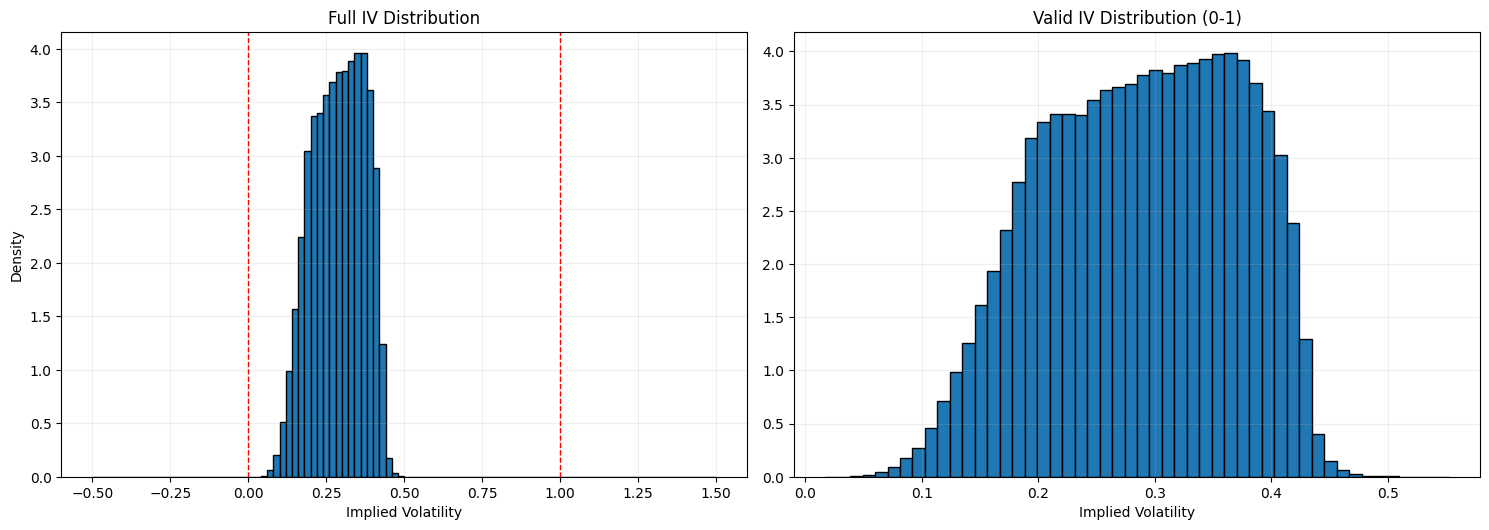

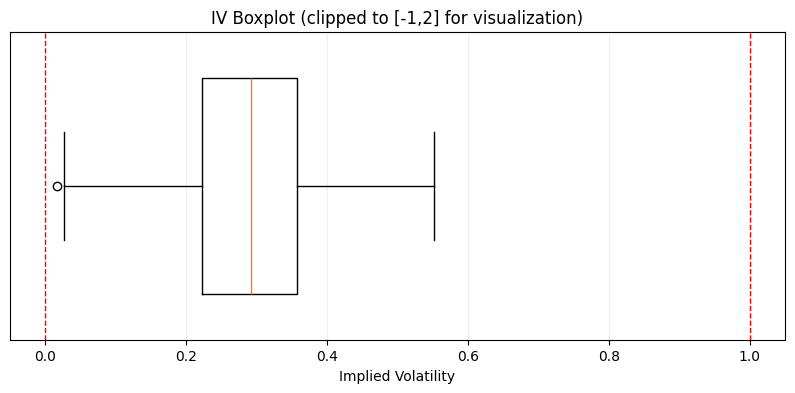

In [10]:
# HAVE MORE INSIGHTS ON THE DATA AND THE DISTRIBUTION OF IMPLIED VOLATILITIES
#================================================================================

def verify_clean_dataset(clean_data, clean_ivs, points_per_sample=143):
    """
    Performs comprehensive validation on cleaned dataset:
    1. Checks for remaining NaN values
    2. Validates implied volatility range (0-1)
    3. Verifies parameter set ordering consistency
    4. Checks maturity/strike structure
    
    Args:
        clean_data: (N*143, 7) array of [params, strike, maturity]
        clean_ivs: (N*143,) array of implied volatilities
        points_per_sample: Points per parameter set (default 143)
    """
    # --- Basic Integrity Checks ---
    print("=== Dataset Integrity Checks ===")
    print(f"NaN in clean_data: {np.isnan(clean_data).any()}")
    print(f"NaN in clean_ivs: {np.isnan(clean_ivs).any()}")
    print(f"IV range: [{clean_ivs.min():.4f}, {clean_ivs.max():.4f}]")
    
    # --- Parameter Set Consistency ---
    print("\n=== Parameter Set Validation ===")
    sample_params = clean_data[::points_per_sample, :5]  # Get first row of each block
    unique_params = np.unique(sample_params, axis=0)
    print(f"Found {len(unique_params)} unique parameter sets")
    
    # --- Strike/Maturity Structure Verification ---
    print("\n=== Option Structure Validation ===")
    first_block = clean_data[:points_per_sample]
    maturities, counts = np.unique(first_block[:,6], return_counts=True)
    print(f"Maturities per set: {len(maturities)} (expected: 11)")
    print(f"Options per maturity: {counts[0]} (expected: 13)")
    
    # --- Sample Data Inspection ---
    print("\n=== First Parameter Set Sample ===")
    print("Parameters:", clean_data[0,:5])
    print("First 5 options:")
    for i in range(5):
        print(f"K={clean_data[i,5]:.4f} | T={clean_data[i,6]:.4f} | IV={clean_ivs[i]:.4f}")

def analyze_iv_distribution(clean_ivs):
    """
    Comprehensive analysis of implied volatility distribution:
    - Statistical summary
    - Visualization of valid/invalid ranges
    - Outlier detection
    
    Args:
        clean_ivs: Array of implied volatilities
    """
    # --- Statistical Analysis ---
    stats = {
        'total': len(clean_ivs),
        'valid': np.sum((clean_ivs >= 0) & (clean_ivs <= 1)),
        'negative': np.sum(clean_ivs < 0),
        'excessive': np.sum(clean_ivs > 1)
    }
    
    print(f"IV Statistics:\n"
          f"- Total points: {stats['total']}\n"
          f"- Valid IV [0-1]: {stats['valid']} ({stats['valid']/stats['total']:.2%})\n"
          f"- Negative IV: {stats['negative']} ({stats['negative']/stats['total']:.2%})\n"
          f"- IV > 1: {stats['excessive']} ({stats['excessive']/stats['total']:.2%})")

    # --- Visualization ---
    plt.figure(figsize=(15,10))
    
    # Main distribution plot
    plt.subplot(2,2,1)
    plt.hist(clean_ivs, bins=100, range=(-0.5,1.5), density=True, edgecolor='k')
    plt.axvline(0, c='r', ls='--', lw=1)
    plt.axvline(1, c='r', ls='--', lw=1)
    plt.title('Full IV Distribution')
    plt.xlabel('Implied Volatility')
    plt.ylabel('Density')
    plt.grid(alpha=0.2)

    # Valid range zoom
    plt.subplot(2,2,2)
    valid_ivs = clean_ivs[(clean_ivs >=0) & (clean_ivs <=1)]
    plt.hist(valid_ivs, bins=50, density=True, edgecolor='k')
    plt.title('Valid IV Distribution (0-1)')
    plt.xlabel('Implied Volatility')
    plt.grid(alpha=0.2)

    # Negative IVs (if any)
    if stats['negative'] > 0:
        plt.subplot(2,2,3)
        plt.hist(clean_ivs[clean_ivs<0], bins=max(5, stats['negative']//10), edgecolor='k')
        plt.title('Negative IV Distribution')
        plt.xlabel('Implied Volatility')
        plt.grid(alpha=0.2)

    # Excessive IVs (if any)
    if stats['excessive'] > 0:
        plt.subplot(2,2,4)
        plt.hist(clean_ivs[clean_ivs>1], bins=max(5, stats['excessive']//10), edgecolor='k')
        plt.title('Excessive IV Distribution (>1)')
        plt.xlabel('Implied Volatility')
        plt.grid(alpha=0.2)

    plt.tight_layout()
    plt.show()

    # --- Outlier Analysis ---
    plt.figure(figsize=(10,4))
    boxplot_data = clean_ivs[(clean_ivs >= -1) & (clean_ivs <= 2)]
    plt.boxplot(boxplot_data, vert=False, widths=0.7)
    plt.axvline(0, c='r', ls='--', lw=1)
    plt.axvline(1, c='r', ls='--', lw=1)
    plt.title('IV Boxplot (clipped to [-1,2] for visualization)')
    plt.xlabel('Implied Volatility')
    plt.yticks([])
    plt.grid(alpha=0.2)
    plt.show()

# Example usage
verify_clean_dataset(clean_data, clean_ivs)
analyze_iv_distribution(clean_ivs)

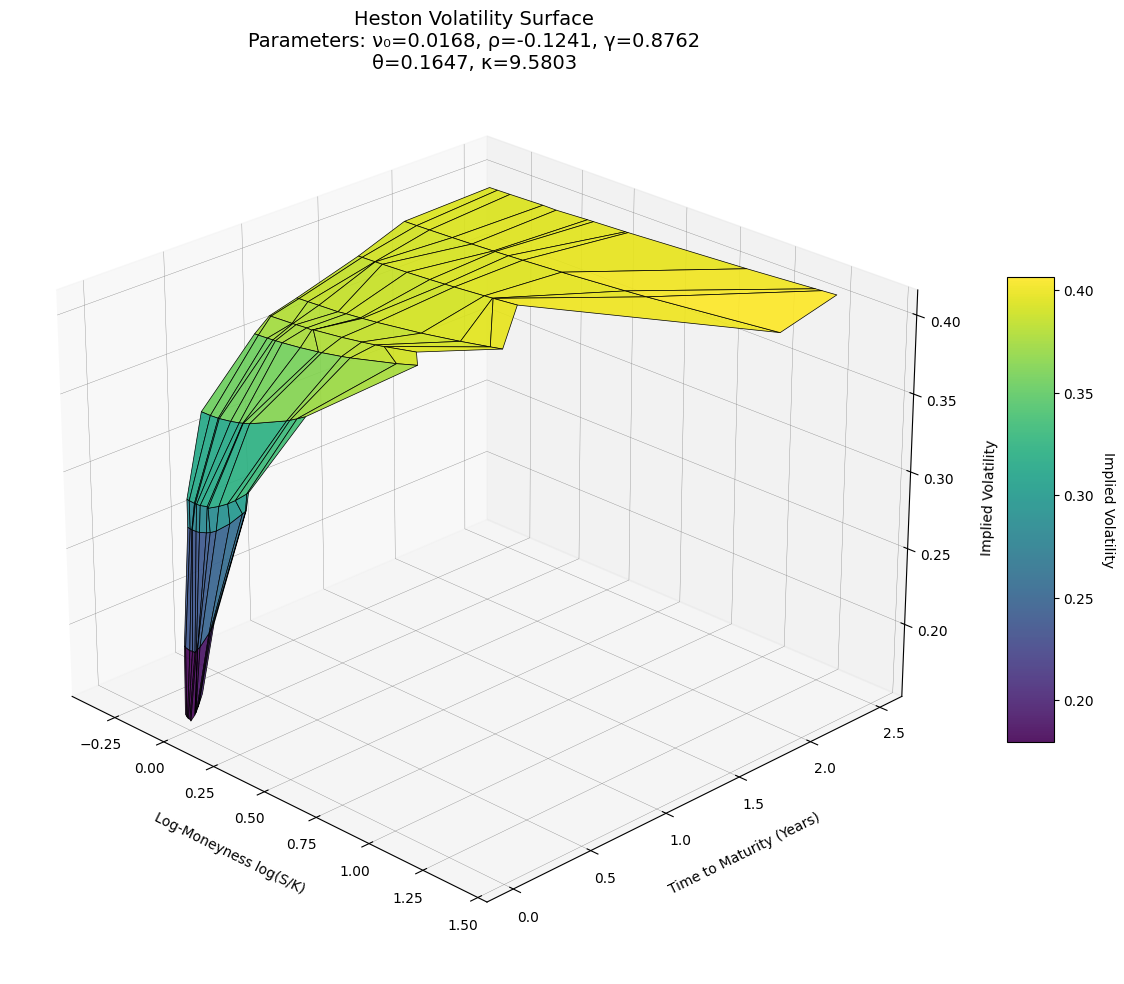

In [11]:
# PLOT ONE IMPLIED VOLATILITY SURFACE
from mpl_toolkits.mplot3d import Axes3D


def plot_heston_vol_surface(data, ivs, param_set_idx=0, points_per_set=143, 
                           use_log_moneyness=True, show_implied_vols=True):
    """
    Plots a 3D volatility surface for a specific Heston parameter set.
    
    Args:
        data: Full dataset array (N*143,7) with columns [v0,rho,gamma,theta,kappa,strike,maturity]
        ivs: Implied volatilities array (N*143,)
        param_set_idx: Index of parameter set to visualize (default: 0)
        points_per_set: Number of options per parameter set (default: 143)
        use_log_moneyness: Whether to plot log(K/S0) instead of strikes (default: True)
        show_implied_vols: Whether to show IV values on hover (default: True)
    """
    # Extract the specific parameter set's options
    start_idx = param_set_idx * points_per_set
    end_idx = (param_set_idx + 1) * points_per_set
    param_set = data[start_idx:end_idx]
    param_ivs = ivs[start_idx:end_idx]
    
    # Get parameters for title
    params = param_set[0, :5]
    
    # Prepare grid structure (11 maturities × 13 strikes)
    strikes = param_set[:, 5].reshape(11, 13)
    maturities = param_set[:, 6].reshape(11, 13)
    iv_matrix = param_ivs.reshape(11, 13)
    
    # Calculate log-moneyness if requested
    if use_log_moneyness:
        x_axis = np.log(S0/strikes)  # log(S0/K)
        x_label = "Log-Moneyness log(S/K)"
    else:
        x_axis = strikes
        x_label = "Strike Price K"
    
    # Create 3D plot
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Surface plot
    surf = ax.plot_surface(x_axis, maturities, iv_matrix, 
                          cmap='viridis', edgecolor='k', alpha=0.9,
                          linewidth=0.5, antialiased=True)
    
    # Add colorbar
    cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
    cbar.set_label('Implied Volatility', rotation=270, labelpad=15)
    
    # Customize view angle
    ax.view_init(elev=25, azim=-45)
    
    # Labels and title
    ax.set_xlabel(x_label, labelpad=12)
    ax.set_ylabel('Time to Maturity (Years)', labelpad=12)
    ax.set_zlabel('Implied Volatility', labelpad=12)
    
    title = (f"Heston Volatility Surface\n"
             f"Parameters: ν₀={params[0]:.4f}, ρ={params[1]:.4f}, γ={params[2]:.4f}\n"
             f"θ={params[3]:.4f}, κ={params[4]:.4f}")
    plt.title(title, y=1.05, fontsize=14)
    
    # Add grid lines
    ax.xaxis._axinfo["grid"].update({"linewidth":0.25, "color":"gray"})
    ax.yaxis._axinfo["grid"].update({"linewidth":0.25, "color":"gray"})
    ax.zaxis._axinfo["grid"].update({"linewidth":0.25, "color":"gray"})
    
    # Add strike values on x-axis (every 2nd strike to avoid clutter)
    if not use_log_moneyness:
        ax.set_xticks(strikes[0, ::2])
        ax.set_xticklabels([f"{k:.2f}" for k in strikes[0, ::2]], rotation=45)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming you have loaded your data:
# data = np.loadtxt("HestonRandomGridsDataset.csv", delimiter=",")
# params = data[:, :5]
# strikes = data[:, 5]
# maturities = data[:, 6]
# ivs = data[:, 7]

# Plot with log-moneyness
plot_heston_vol_surface(random_grid_data, implied_vols, param_set_idx=0, use_log_moneyness=True)

In [12]:
# Save the entire dataset (useful)
def save_heston_dataset(clean_data , clean_ivs, filename="HestonRandomGridsDataset.csv"):
    """
    Save the complete Heston dataset (parameters + strikes + maturities + implied vols) to a CSV file.
    
    Args:
        random_grid_data: numpy array of shape (N, 7) with columns [v0, rho, gamma, theta, kappa, strike, maturity]
        implied_vols: numpy array of shape (N,) with implied volatilities
        filename: output CSV filename (default: "HestonRandomGridsDataset.csv")
    
    Returns:
        None (saves a CSV file)
    """
    # Convert to DataFrame for clean CSV export
    df = pd.DataFrame(
        data=np.column_stack((clean_data, clean_ivs)),
        columns=["v0", "rho", "gamma", "theta", "kappa", "strike", "maturity", "implied_vol"]
    )
    
    # Optional: Remove rows with NaN implied volatilities
    df_clean = df.dropna(subset=["implied_vol"])
    
    # Save to CSV
    df_clean.to_csv(filename, index=False)
    print(f"Dataset successfully saved to {filename}")
    print(f"Shape: {df_clean.shape}, {len(df) - len(df_clean)} rows removed due to NaN values")

# Example usage:
save_heston_dataset(clean_data, clean_ivs)

Dataset successfully saved to HestonRandomGridsDataset.csv
Shape: (1949233, 8), 0 rows removed due to NaN values
